# M3: Advanced Matplotlib Graphing Assignment

In this assignment, I'm required to use Jupyter, pandas, and matplotlib to create graphs that highlight a specific aspect of a data set using the course file ConstructionTimeSeriesDatav2.csv

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [14]:
""" Import the Construction Time Series Data CSV File into Jupyter"""
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv', index_col = "Month")
df.head() # To see the different data elements
df.tail() #

,Month-Year,Total Construction,Private Construction,Public Construction
Month,,,,
142,Oct-13,85193,59370,25823
143,Nov-13,77931,55191,22741
144,Dec-13,71502,52132,19369
145,Jan-14,64661,47827,16834
146,Feb-14,63368,46647,16721


In [15]:
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b-%y') # Converts the "Month Year" to A Date Time Format
# Resample Will Get the Annual Data
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
df_resample = df.resample('Y',on="Month-Year", convention = 'start').mean() # Resamples the Monthly Data to annual Data by taking the average (2014 only has )
df_resample = df_resample.iloc[:-1] # Drop the two months in 2014, as they are two months of the year, would skew results
df_resample['Private Construction'] = df_resample['Private Construction'] /100
df_resample['Public Construction'] = df_resample['Public Construction'] /100
df_resample

,Total Construction,Private Construction,Public Construction
Month-Year,,,
2002-12-31,70656.416667,528.699167,177.865000
2003-12-31,74291.500000,562.812500,180.105833
2004-12-31,82613.083333,642.645833,183.486667
2005-12-31,92011.333333,724.981667,195.133333
2006-12-31,97268.500000,759.864167,212.822500
2007-12-31,96029.416667,719.398333,240.895000
2008-12-31,88963.750000,632.355000,257.281667
2009-12-31,75266.750000,490.256667,262.412500
2010-12-31,67046.833333,417.163333,253.306667


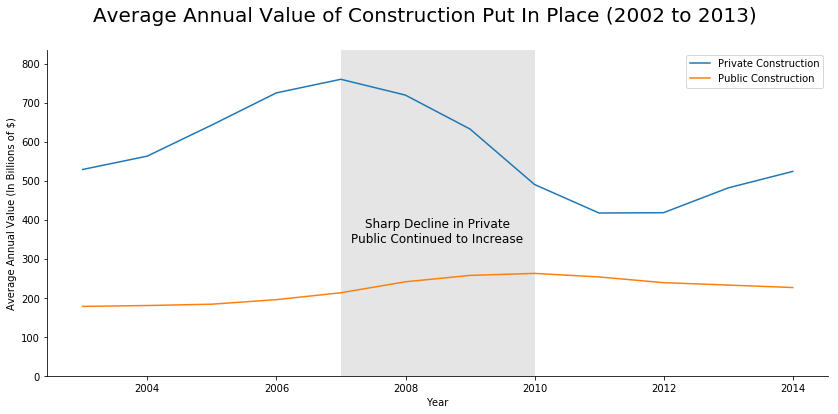

In [16]:
fig,ax = plt.subplots()
fig.suptitle('Average Annual Value of Construction Put In Place (2002 to 2013)', fontsize = 20)

ax.plot(df_resample['Private Construction'])
ax.plot(df_resample['Public Construction'])

# Axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,max(df_resample['Private Construction'])*1.1)
ax.legend(loc=1)
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Value (In Billions of $)') # Axis Values drawn from the US Census Website
ax.axvspan('2006-12-31','2009-12-31',ymin=0,ymax = 900,facecolor='k',alpha=0.1)
#ax.axvspan('2010-12-31','2013-12-31',ymin=0,ymax = 300000,facecolor='k',alpha=0.1)
ax.text('2008-06-30',370,'Sharp Decline in Private\nPublic Continued to Increase',fontsize=12,verticalalignment='center',horizontalalignment='center')


fig.set_size_inches(14,6)

plt.show()

In the figure above, I chose to highlight the differences in the average annual construction of the private and public areas. 

It is interesting that while there was a sharp decrease in annual private construction, public construction did not see a decline until the beging